In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 


In [149]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

In [226]:
#observable = 'dphi'
#observable = 'jetpt'
observable = 'qt'
#observable = 'jeteta'

symbol = {}
symbol['dphi'] = '$\Delta\phi$ '
symbol['jeteta'] = '$\eta^{jet}$'
symbol['qt']  = '$q_{T}/Q$'
symbol['jetpt'] = '$p_{T}^{jet}$'

y = {} 
x = {} 
xerr = {}

altmc = 'Django'
mc = 'Rapgap'
names = {}
names['nominal'] = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,mc)
names['sys0']    = 'outputfiles/CrossSection_%s_%s_sys_0_ep0607_data_nominal.npy'%(observable,mc)
names['sys1']   =  'outputfiles/CrossSection_%s_%s_sys_1._ep0607_data_nominal.npy'%(observable,mc)
#names['sys4']   =  'outputfiles/CrossSection_%s_%s_sys_6_ep0607_data_nominal.npy'%(observable,mc)
names['sys5']   =  'outputfiles/CrossSection_%s_%s_sys_5_ep0607_data_nominal.npy'%(observable,mc)
#names['sys7']   =  'outputfiles/CrossSection_%s_%s_sys_7_ep0607_data_nominal.npy'%(observable,mc)
#names['sys10']    = 'outputfiles/CrossSection_%s_%s_sys_10_ep0607_data_nominal.npy'%(observable,mc)
names['sys11']    = 'outputfiles/CrossSection_%s_%s_sys_11_ep0607_data_nominal.npy'%(observable,mc)
names['model']   = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,altmc)


label = {}
label['test'] = 'repeat'
label['sys5'] = 'HFS scale (in jet)' #'Lepton energy scale'
label['sys1'] = 'HFS scale (remainder)'
label['sys4'] = 'HFS polar angle'
label['sys7'] = 'HFS azimuthal angle' #HFS azimuthal angle
label['sys0'] = 'Lepton energy scale'
label['sys10'] = 'Lepton polar angle'
label['sys11'] = 'Lepton azimuthal angle'
label['nonclosure'] = 'Non-closure'

label['model'] = 'Model'
#names['sys10']   =  'CrossSection_jetpt_Django_nominal_em0405_data_nominal.npy'

In [227]:

for key in names.keys():
    with open('%s'%names[key], 'rb') as f:
        print(key)
        y[key] = np.load(f)
        x[key] = np.load(f)

        xerr[key] = np.load(f)
        
        print('y = ',y[key])
        print('x = ', x[key])
        #print(xerr[key])

nominal
y =  [2.96247352 4.41215245 3.19624586 1.59427825 0.64879174 0.21678764
 0.06781079 0.00795976]
x =  [0.01167419 0.04410836 0.10178536 0.2043512  0.38674191 0.71108356
 1.28785364 2.31351199]
sys0
y =  [2.89557846 4.28132767 3.12020755 1.61410854 0.6614996  0.22735671
 0.07097301 0.00836712]
x =  [0.01167419 0.04410836 0.10178536 0.2043512  0.38674191 0.71108356
 1.28785364 2.31351199]
sys1
y =  [3.01045609 4.35860014 3.14589331 1.57368419 0.65009053 0.22757452
 0.07103517 0.00830258]
x =  [0.01167419 0.04410836 0.10178536 0.2043512  0.38674191 0.71108356
 1.28785364 2.31351199]
sys5
y =  [3.15089814 4.36787287 3.09164266 1.59558997 0.6569511  0.22150241
 0.06808347 0.00872374]
x =  [0.01167419 0.04410836 0.10178536 0.2043512  0.38674191 0.71108356
 1.28785364 2.31351199]
sys11
y =  [3.04699481 4.37655911 3.10837157 1.59645953 0.66404065 0.22221073
 0.06797499 0.00795355]
x =  [0.01167419 0.04410836 0.10178536 0.2043512  0.38674191 0.71108356
 1.28785364 2.31351199]
model
y =  

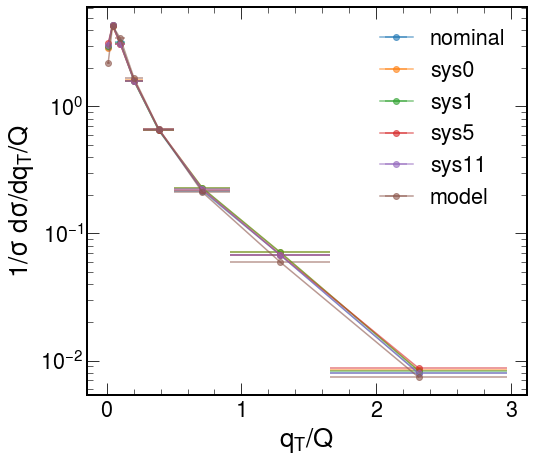

In [228]:
fig,ax = plt.subplots(figsize=(8,7))
for key in names.keys():
    plt.errorbar(x[key],y[key],xerr=xerr[key],fmt='o-',label=key,alpha=0.6)
    plt.yscale('log')
    #plt.xscale('log')
    
    plt.legend()
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

plt.tight_layout()
fig.savefig('figures/Systematic uncertainties_variations_%s.png'%observable)


In [ ]:
##add 10% non closure systematics

In [229]:
nonclosure_sys = 1.10
if 'dphi' in observable or 'eta' in observable:
    nonclosure_sys = 1.05
    
y['nonclosure'] = y['nominal']*nonclosure_sys
print (y.keys())

dict_keys(['nominal', 'sys0', 'sys1', 'sys5', 'sys11', 'model', 'nonclosure'])


sys0
sys1
sys5
sys11
model
nonclosure


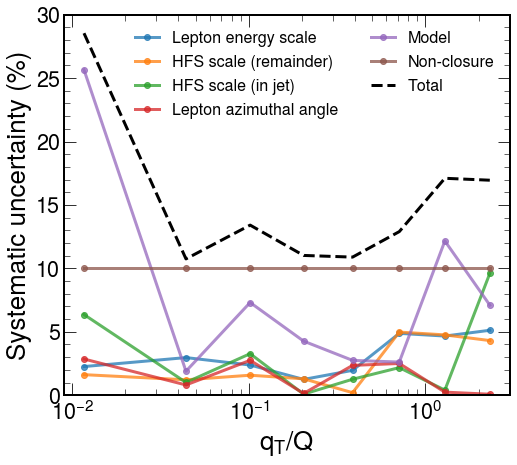

In [230]:
fig,ax = plt.subplots(figsize=(8,7))

total = np.zeros(len(y['nominal']))
ratio = {}

for key in y.keys():
    if 'nominal' in key:continue
    print (key)
    ratio[key] = np.divide(y[key],y['nominal']) -1
    total += ratio[key]*ratio[key]
    plt.plot(x['nominal'],100*abs(ratio[key]),'o-',label=label[key],lw=3,alpha=0.75)

total = np.sqrt(total)
N      = np.multiply( y['nominal'], xerr['nominal']*2.0)
#plt.plot(x['nominal'],100*np.sqrt(1/N), 'o--',label = 'stat error ',lw=3)
plt.plot(x['nominal'],100*total, '--',label = 'Total',lw=3,color='k')

plt.ylabel('Systematic uncertainty (%)')
plt.legend(loc='best',fontsize=16,ncol=2)
plt.xlabel(symbol[observable])

if 'qt' in observable or 'pt' in observable:
    plt.xscale('log')
plt.ylim([0,30])
plt.show()


fig.savefig('figures/Systematic uncertainties_%s.png'%observable)


In [231]:
up = np.multiply(y['nominal'],(1+total))
do = np.multiply(y['nominal'],(1-total))

errory = np.subtract(up,do)
print (errory)
print (x['nominal'])
print (y['nominal'])

print (xerr['nominal'])

[1.69092709 0.94835058 0.85717505 0.35133641 0.14126514 0.05591935
 0.02319273 0.00269828]
[0.01167419 0.04410836 0.10178536 0.2043512  0.38674191 0.71108356
 1.28785364 2.31351199]
[2.96247352 4.41215245 3.19624586 1.59427825 0.64879174 0.21678764
 0.06781079 0.00795976]
[0.01167419 0.02075997 0.03691703 0.0656488  0.11674191 0.20759974
 0.36917034 0.65648801]


In [206]:
help(make_error_boxes)

Help on function make_error_boxes in module __main__:

make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r', edgecolor='None', alpha=0.5)



In [207]:
print(symbol[observable])

$\eta^{jet}$


No handles with labels found to put in legend.


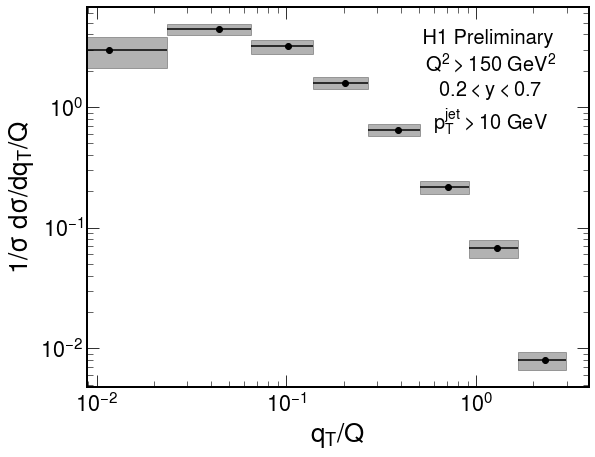

<Figure size 720x720 with 0 Axes>

In [232]:
fig,ax = plt.subplots(figsize=(9,7))

#plt.fill_between(x['nominal'], do, up,alpha=0.3,color='k',label='syst. error')
plt.errorbar(x['nominal'], y['nominal'],xerr=xerr['nominal'],fmt='o',color='k')
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

xposition = 0.2
if 'jetpt' in observable:
    xposition = 0.8
if 'qt' in observable:
    xposition = 0.8
if 'eta' in observable:
    xposition = 0.8
    
plt.text(xposition, 0.8,' H1 Preliminary \n $Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=20)
plt.legend(loc='best',fontsize=18)

#plt.title('H1 Preliminary')
if 'dphi' in observable:
    plt.yscale('log')
if 'eta' in observable:
    print ('eta')

if 'jetpt' in observable:
    plt.xscale('log')
    plt.yscale('log')
    
if 'qt' in observable:
    plt.xscale('log')
    plt.yscale('log')
    

for i in range(len(x['nominal'])):
    x1 = x['nominal'][i] - xerr['nominal'][i]
    x2 = x['nominal'][i] + xerr['nominal'][i]
    r  = np.array([x1,x2])
    y1 = do[i]
    y2 = up[i]
    plt.fill_between(r,y1,y2, alpha=0.3,color='k',label='syst. error')

    
if 'eta' in observable:
    plt.ylim(bottom=0.0)
        
plt.show()
plt.tight_layout()

fig.savefig('figures/FinalResult_%s.png'%observable)